**Stock Analysis of Financial Sectors**

In [21]:
#import pandas to use series and dataframe
#import numpy for quantitative work
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [22]:
# Use pip to install datareader module 
!pip install pandas_datareader

In [23]:
from pandas_datareader import DataReader

In [24]:
#install seaborn to use graphs
!pip install seaborn

In [25]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [26]:
from datetime import datetime

In [27]:
from __future__ import division

The Stocks analyzed in this program:

Energy Transfer (ET), Crestwood Equity (CEQP), Enterprise Products (EPD), Phillips 66 Partners

In [28]:
#List of companies that will be compared in this analysis
tech_list = ['ET', 'CEQP', 'EPD', 'PSXP']

In [29]:
#Set start and end date to today and a year ago today respectively
end=datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [30]:
#Takes data for each stock from Yahoo Finance
for stock in tech_list:
    globals()[stock]= DataReader(stock, 'yahoo', start, end)

In [31]:
#Quick summary of selected stock
ET.describe(include = 'all')

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,14.111107,13.803123,13.980870,13.949417,1.215599e+07,13.388508
std,1.158231,1.178626,1.166715,1.169932,6.546410e+06,0.856646
min,11.300000,10.840000,11.160000,11.160000,1.176718e+06,11.160000
25%,13.180000,12.960000,13.100000,13.070000,7.783700e+06,12.868622
50%,14.340000,14.010000,14.170000,14.140000,1.074450e+07,13.498593
75%,15.090000,14.810000,15.000000,14.970000,1.445030e+07,14.119548
max,15.980000,15.700000,15.800000,15.740000,5.800790e+07,14.738071


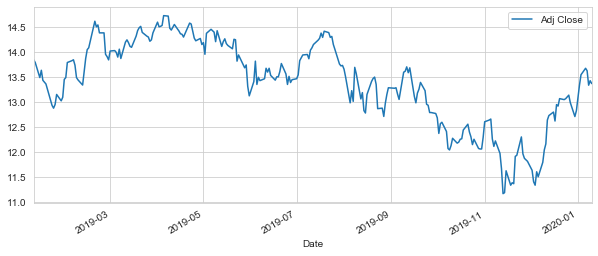

In [32]:
#Plot of Adjusted CLosing Price of selected stock
ET['Adj Close'].plot(legend=True, figsize = (10,4))

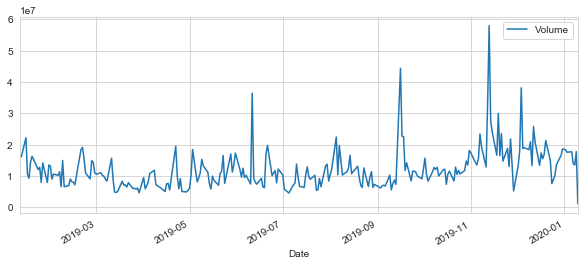

In [33]:
#Plot of Volume of selected stock
ET['Volume'].plot(legend=True, figsize = (10,4))

In [34]:
#Use For-loop to calculate moving averages of selected stock
#Look at 50 days to determine value of a short term trade and 200 days to determine the value of a long term investment
ma_day = [50,200]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    ET[column_name]= pd.Series.rolling(ET['Adj Close'], ma).mean()

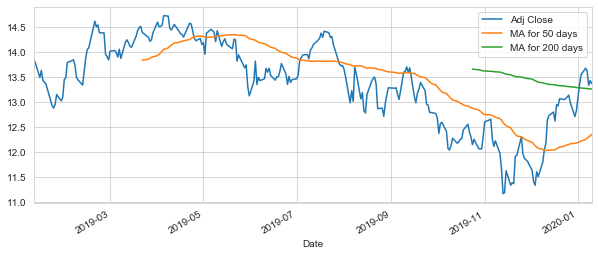

In [35]:
#Plot moving averages of selected stock
ET[['Adj Close', 'MA for 50 days', 'MA for 200 days']].plot(subplots = False, figsize=(10,4))

In [36]:
#Create new column that determines daily return by calculating percentage change
ET['Daily Return'] = ET['Adj Close'].pct_change()

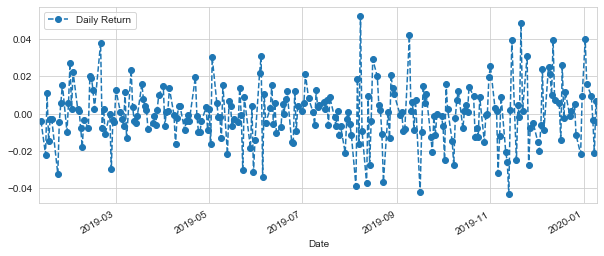

In [37]:
#Plot Daily Return of selected stock
ET['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

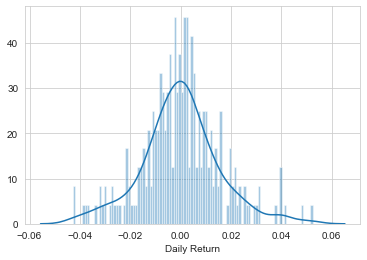

In [38]:
#Plot Distribution Plot of Daily Return of selected stock bereft of null values
sns.distplot(ET['Daily Return'].dropna(), bins = 100)

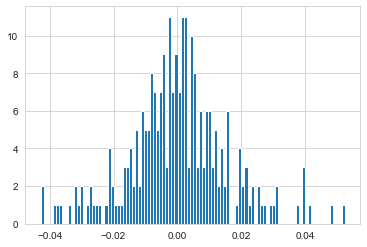

In [39]:
#Plot Histogram Daily Return of selected stock
ET['Daily Return'].hist(bins = 100)

In [40]:
#Create new data frame of closing prices by date for each stock provided in this analysis project.
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [41]:
#Quick summary of closing prices
closing_df.head()

Symbols,ET,CEQP,EPD,PSXP
Date,,,,
2019-01-10,13.850938,29.181181,25.453720,45.599651
2019-01-11,13.795900,28.705706,25.397348,44.962555
2019-01-14,13.493198,28.192934,25.557077,44.644005
2019-01-15,13.639962,29.227797,25.716808,46.040001
2019-01-16,13.438160,29.069305,25.820164,46.133701


In [42]:
#Percentage change of closing price for each stock by day 
tech_rets= closing_df.pct_change()

In [43]:
#Quick summary of daily percentage changes of stocks
tech_rets.tail()

Symbols,ET,CEQP,EPD,PSXP
Date,,,,
2020-01-06,0.009594,0.022901,0.010563,0.008582
2020-01-07,-0.003655,-0.004975,0.000697,0.020800
2020-01-08,-0.021277,-0.005625,-0.002786,-0.005248
2020-01-09,0.006747,-0.005028,-0.002793,-0.000621
2020-01-10,-0.004468,-0.005212,-0.003855,-0.000466


In [44]:
#Import moduel for use of statistical analysis
import scipy.stats as stats

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


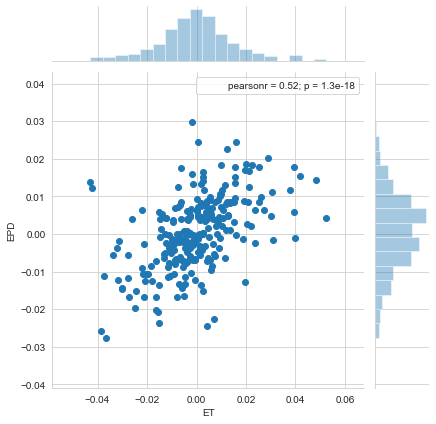

In [45]:
#Examine correlation between percentage change for two of the stocks
sns.jointplot('ET', 'EPD', tech_rets, kind = 'scatter').annotate(stats.pearsonr)

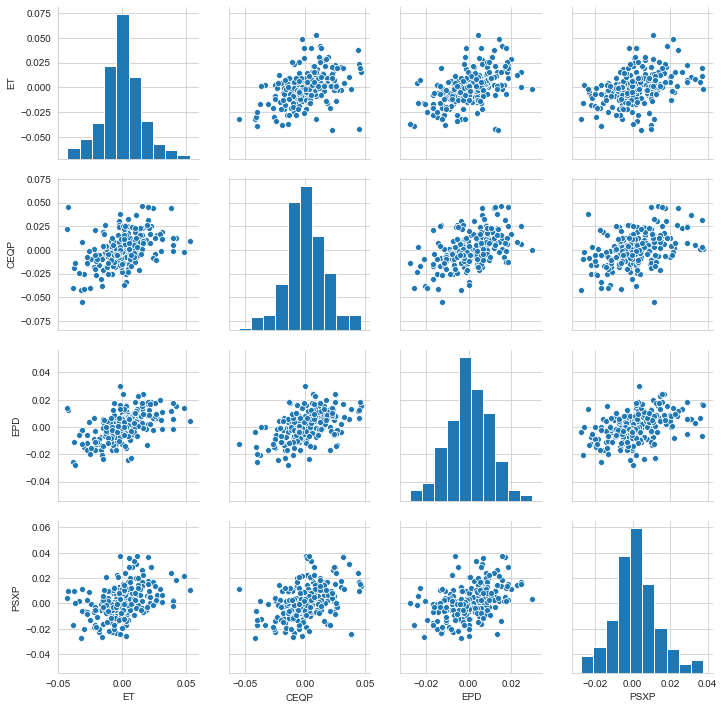

In [46]:
sns.pairplot(tech_rets.dropna())

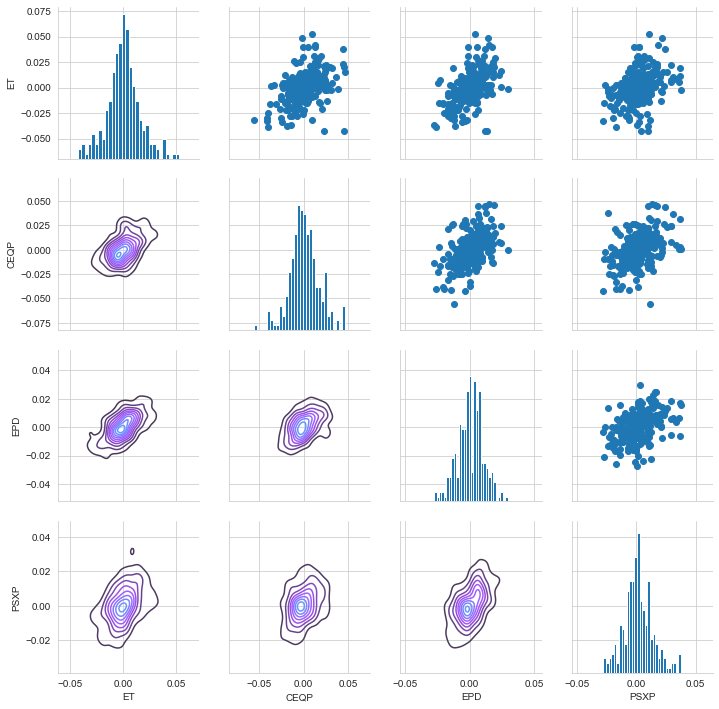

In [47]:
#Plot scatter, histogram, and kde figures to examine correlation between percentage changes in closing prices
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)

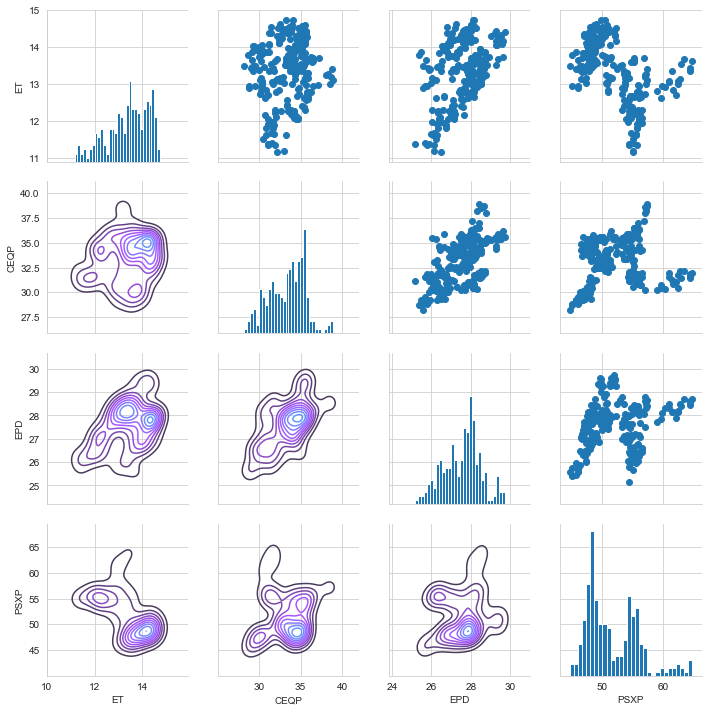

In [48]:
#Plot scatter, histogram, and kde subplots to examine closing price correlations
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)

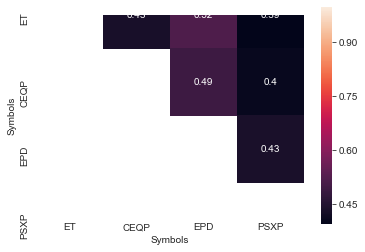

In [49]:
#Heat map that displays correlational values between daily percentages changes.  
#Use mask to hide duplicate values so only unique values are displayed
mask = np.tril(tech_rets.dropna().corr())
sns.heatmap(tech_rets.dropna().corr(), square = True, mask = mask, annot = True)

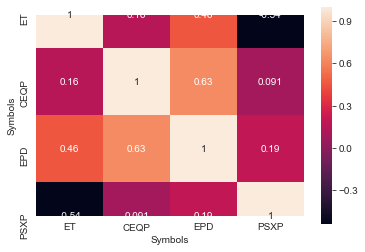

In [50]:
#Heat map displaying correlation of CLosing Prices by day between stocks
#Mask is used to hide duplicate values so only unique ones are shown
#mask = np.tril(closing_df.dropna().corr())
sns.heatmap(closing_df.dropna().corr(), square = True, annot = True)

In [51]:
#New data frame is created that drops the null values of the daily percentage changes data frame 
rets = tech_rets.dropna()

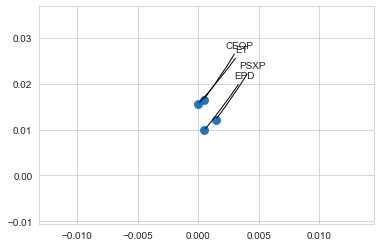

In [52]:
#Graph the stocks based on the averages and standard deviations of daily percentage changes for Risk Analysis
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),s = area)
plt.xlabel = ('Expected Return')
plt.ylabel = ('Risk')
for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label, 
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', color = 'black',connectionstyle = 'arc3, rad = -.03'))

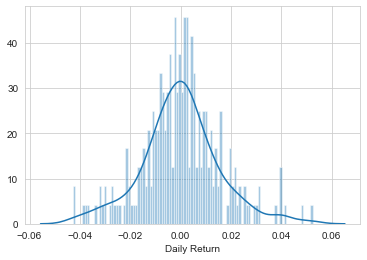

In [53]:
#Display distribution plot of selected stock again to set premise for the Monte Carlo Method of 
sns.distplot(ET['Daily Return'].dropna(), bins = 100)

In [54]:
#Quick summary of 
rets.head()

Symbols,ET,CEQP,EPD,PSXP
Date,,,,
2019-01-11,-0.003974,-0.016294,-0.002215,-0.013972
2019-01-14,-0.021941,-0.017863,0.006289,-0.007085
2019-01-15,0.010877,0.036706,0.006250,0.031270
2019-01-16,-0.014795,-0.005423,0.004019,0.002035
2019-01-17,-0.002730,0.003849,0.005095,-0.010154


In [55]:
#The .01 empirical quantile of daily returns
#With 99% confidence, the worst daily loss will not be greater than that percentage.
rets['ET'].quantile(.01)

-0.03802747382524625

In [56]:
#Create variables to be used in Monte Carlo Method of determining Value at Risk
days = 365

dt = 1/days

mu = rets.mean()['ET']

sigma = rets.std()['ET']

In [57]:
#Define Monte Carlo function to run many trials of random market conditions
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [58]:
#Quick summary of stock to see start price from a year ago today
ET.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 50 days,MA for 200 days,Daily Return
Date,,,,,,,,,
2019-01-10,15.18,14.85,15.00,15.10,16524100.0,13.850938,NaN,NaN,NaN
2019-01-11,15.11,14.85,15.00,15.04,16142100.0,13.795900,NaN,NaN,-0.003974
2019-01-14,14.91,14.59,14.84,14.71,22237100.0,13.493198,NaN,NaN,-0.021941
2019-01-15,14.94,14.71,14.71,14.87,10588900.0,13.639962,NaN,NaN,0.010877
2019-01-16,14.94,14.55,14.88,14.65,9296500.0,13.438160,NaN,NaN,-0.014795


TypeError: 'str' object is not callable

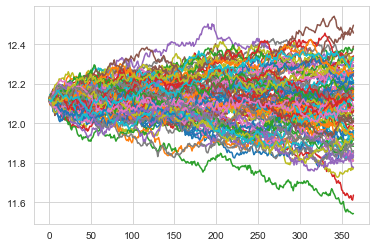

In [59]:
#Run Monte Carlo Method for stock based on start price from a year ago today and daily return value percentages
start_price = 12.12
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for ET")

In [60]:
#Create 10000 trials of monte carlo method for stock
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final Price Distribution of ET after 365 days')

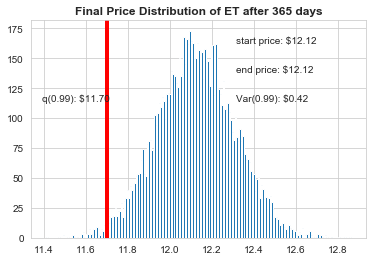

In [61]:
#Set percentiles of simulations
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200)

#Starting Price
plt.figtext(0.6, 0.8, s = "start price: $%.2f" %(start_price))

#Mean Ending Price
plt.figtext(0.6,0.7, s = "end price: $%.2f" %simulations.mean())

#Variance of the Price (within 99% confidence interval)
plt.figtext(0.6,0.6,"Var(0.99): $%.2f " %(start_price-q,))

#Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

#Plot a line at the 1% quantile risk

plt.axvline(x = q, linewidth = 4, color = 'r')

#Title

plt.title(u"Final Price Distribution of ET after% d days" %days, weight = 'bold')